# ASSIGNMENT 16 : K-NEAREST NEIGHBOURS

#### Objective: The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given animal dataset.

#### Tasks:
#### 1. Analyse the data using the visualizations

In [4]:
#import all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Let's load the dataset
df = pd.read_csv(r"F:\Data science Course by ExcelR\ASSIGNMENTS\16. KNN\Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df.shape

(101, 18)

* We have over 100 samples and about 18 columns

In [8]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

These are the names of the columns we have.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


* Most of the columns are int type and only animal name seems to be in object type.
* Apparantly all the features describes which type of animal it is.
* 'type' column probably seems to be the target variable

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


* We can see that we don't have any null values.
* Most of the Standard Deviation seems to be stable as well
* It also revelas that we have 7 types of animals in out type column

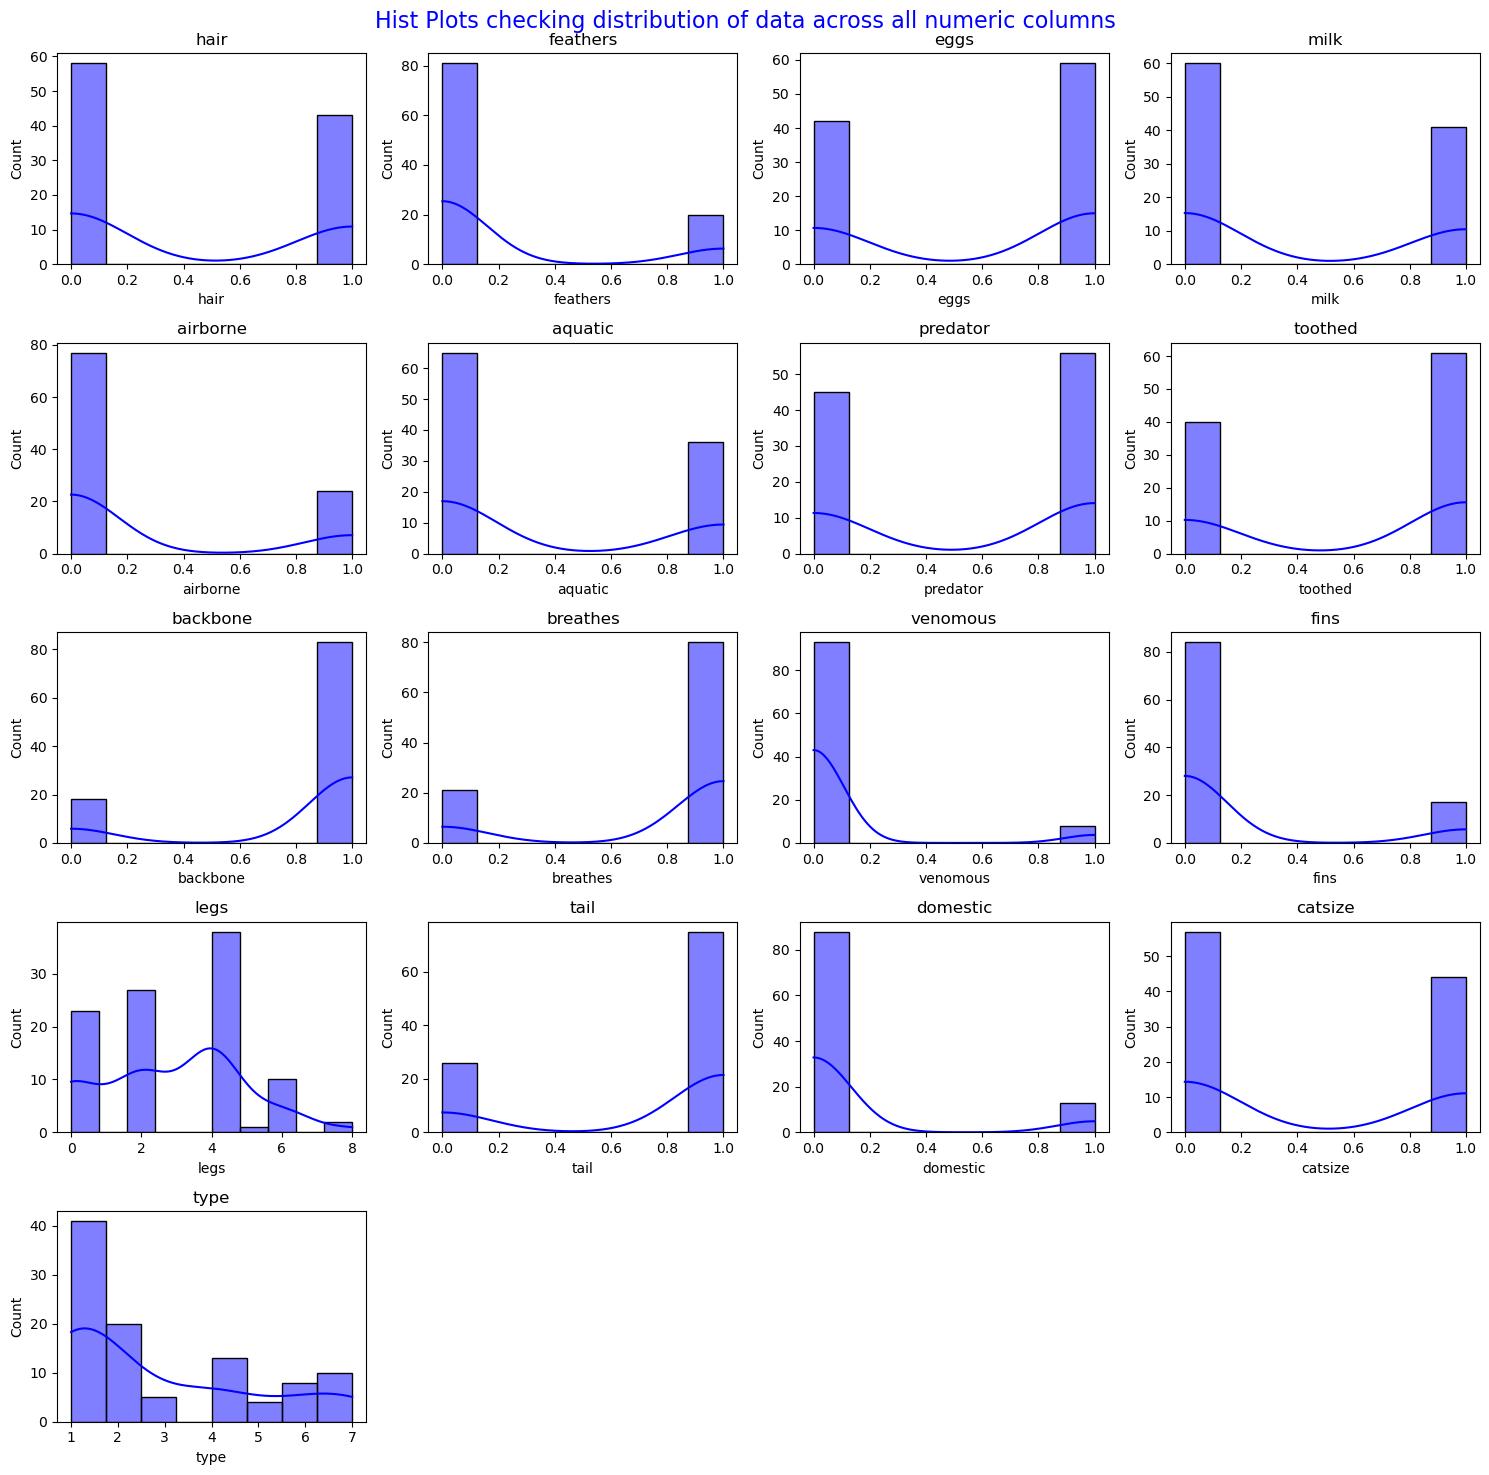

In [14]:
# Let's Visualize all the numerical columns using histplot to understand the distribution of data

plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df.columns[1:]:         #looping through all the columns one by one except the first categorical column
    plt.subplot(5, 4, index)       #creating subplot
    sns.histplot(x=df[col], color='blue', kde=True)         # creating histplot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(f'{col}')
plt.suptitle("Hist Plots checking distribution of data across all numeric columns", fontsize=16, color='blue')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

We can see almost all the columns are bi-variate except a few columns

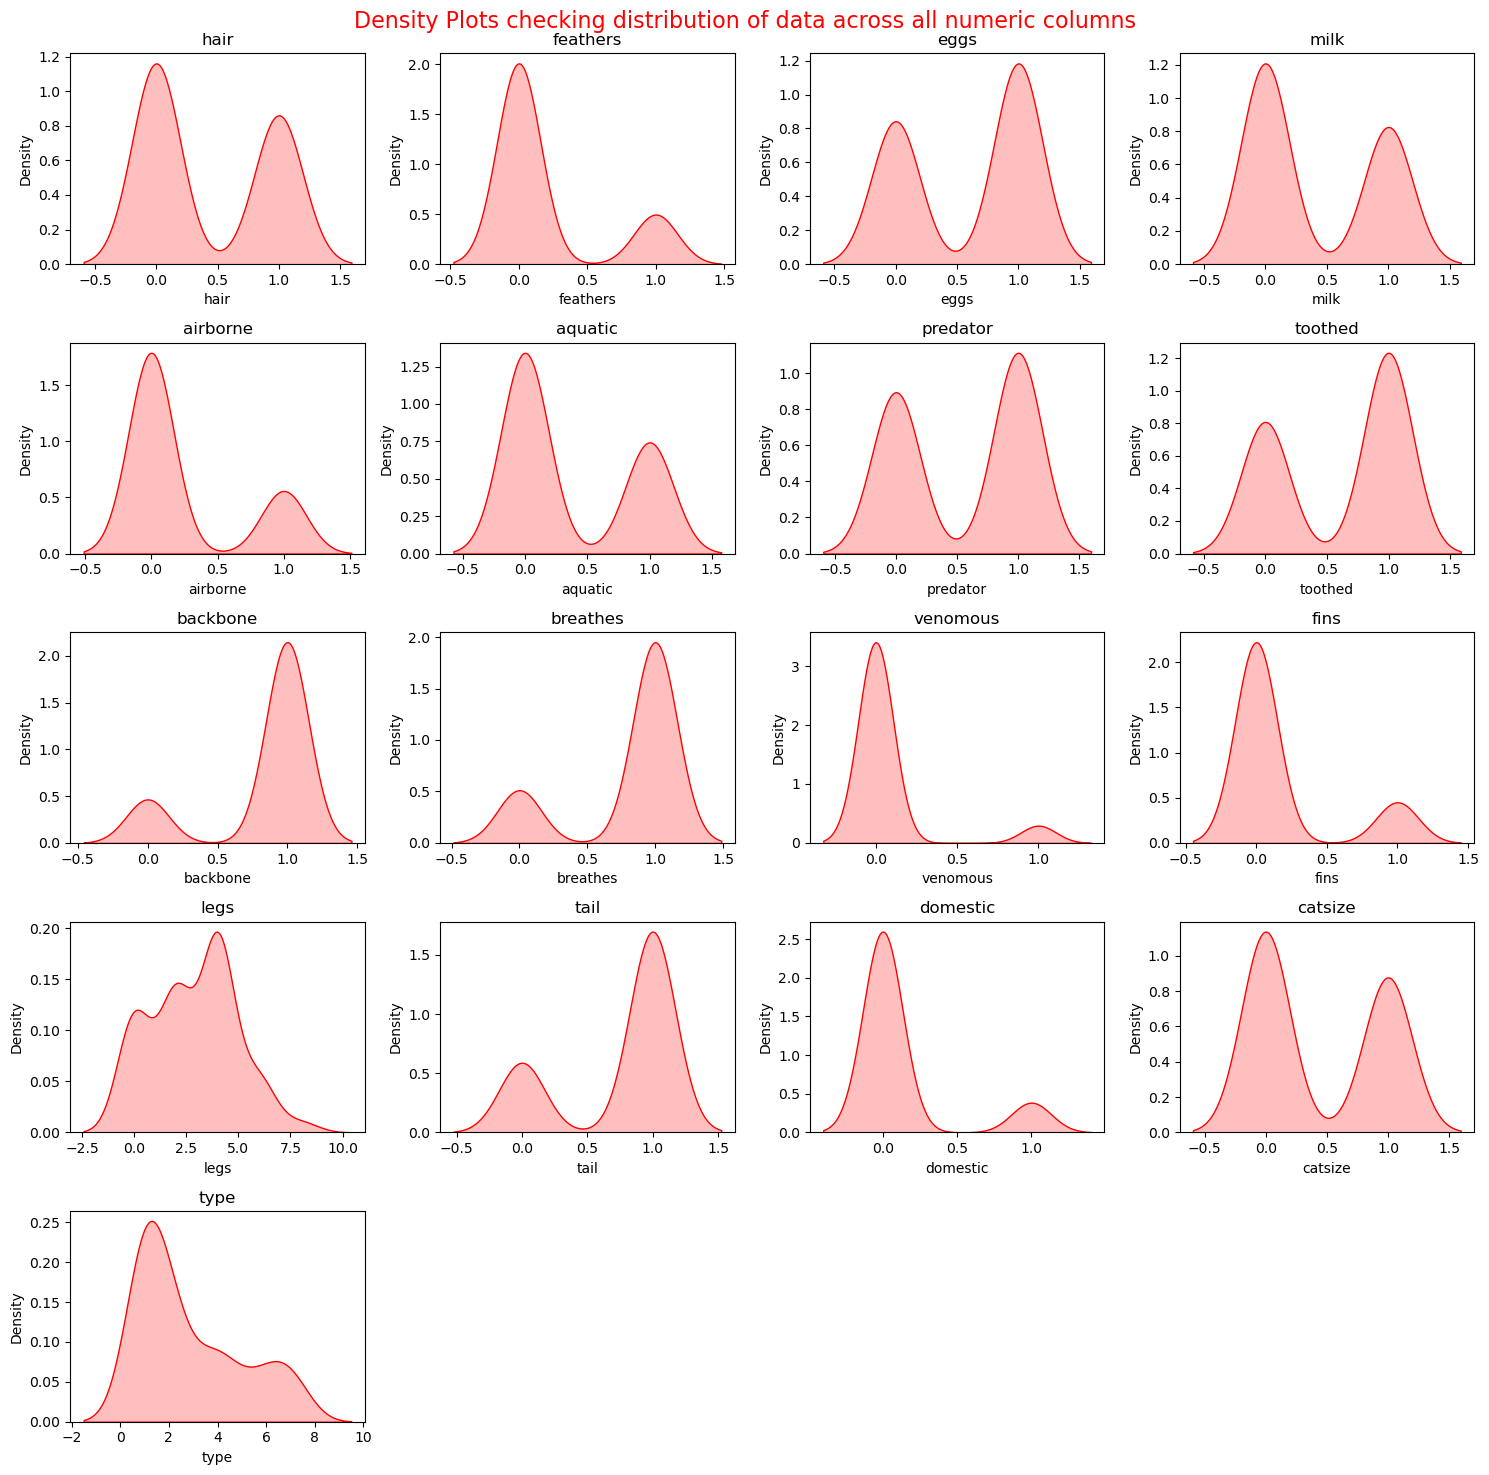

In [16]:
# Let's see the density plot and confirm the above distributions

plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df.columns[1:]:         #looping through all the columns one by one except the first column
    plt.subplot(5, 4, index)       #creating subplot
    sns.kdeplot(x=df[col], color='red', fill=True)         # creating density plot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(f'{col}')            #setting up title
plt.suptitle("Density Plots checking distribution of data across all numeric columns", fontsize=16, color='red')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

* We can make out that most of the columns are positively skewed.
* Most of the columns are bi-modal (having two types of values only)

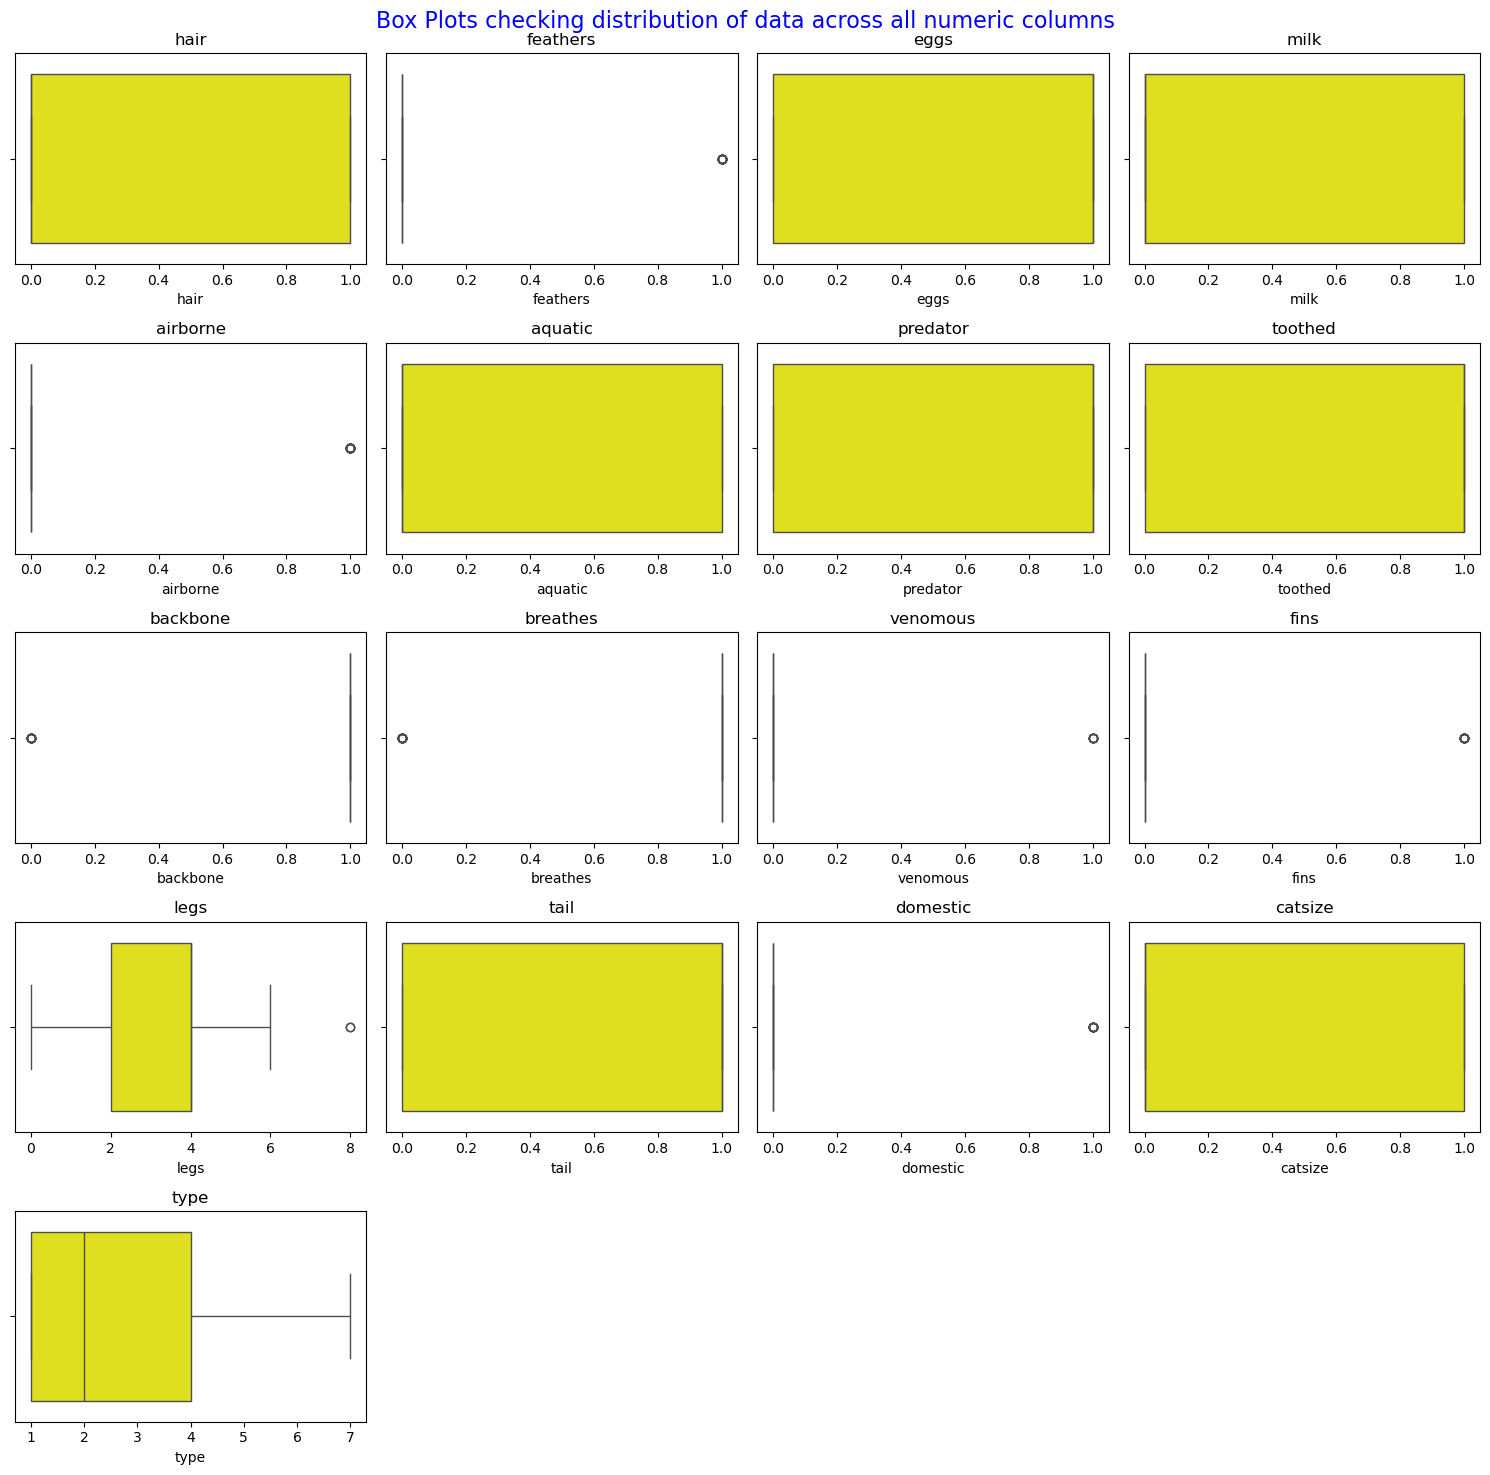

In [18]:
# Let's create boxplot and check if there is anu outlier

plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df.columns[1:]:         #looping through all the columns one by one except the first column
    plt.subplot(5, 4, index)       #creating subplot
    sns.boxplot(x=df[col], color='yellow')         # creating boxplot plot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(f'{col}')            #setting up title
plt.suptitle("Box Plots checking distribution of data across all numeric columns", fontsize=16, color='blue')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

* There seems to be a few number of outliers in the dataset.

##### 2. Preprocess the data by handling missing values & Outliers, if any.


In [21]:
df.isnull().sum().sum()

0

In [22]:
df.duplicated().sum()

0

* No Null Values and No Duplicate Value.
* For this example since we don't have a lot of data points so **we are assuming** all the data points are important and we'll be retaining all of them.
* There is also no need of Standardizing the dataset since it mostly has bi variate data also the statistical summary of data seems to quite stable.
* We have only one categorical column and it is the name of all the animals so there's no point in converting it, infact we'll be removing it when we extract the features.

In [24]:
#Feature Extraction
x = df.drop(['animal name','type'], axis=1)
y = df['type']
x.shape, y.shape

((101, 16), (101,))

#### 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80, 16), (21, 16), (80,), (21,))

#### 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [28]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)          # We are only guessing here based on the number of types given in the dataset we need to be more sure about this
model.fit(x_train, y_train)                          # fitting the model

KNeighborsClassifier(n_neighbors=7)

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(model.predict(x_test), y_test))

Accuracy Score:  0.8571428571428571


* Hence when we choose the number of neighbors as 7 we are getting an accuracy score og 85% let's find the most optimul values and then build a better model

#### 5. Choose an appropriate distance metric and value for K.

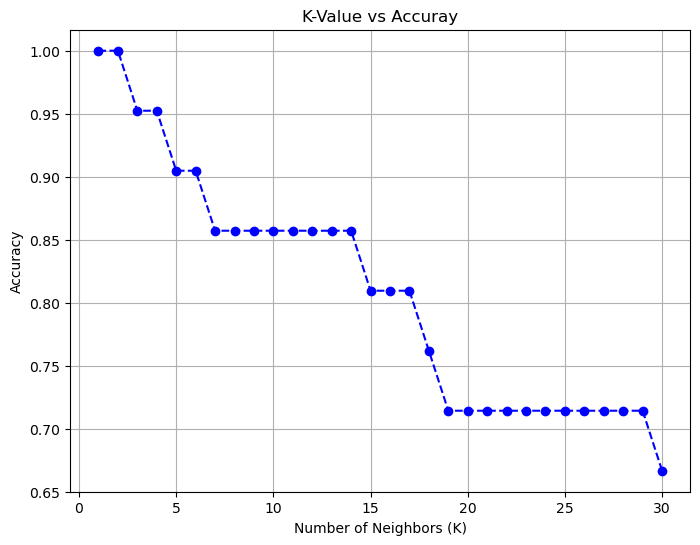

In [32]:
# Let's find the best k value for this model

k_values = range(1, 31)     #experimenting from 1 to 30 k values
accuracies = []             #we'll be holding the accuracies in this list

for k in k_values:          # run the loop from 1 to 30
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracies.append(accuracy_score(knn.predict(x_test), y_test))

#Let's plot the accuracy graph
plt.figure(figsize = (8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("K-Value vs Accuray")
plt.grid()
plt.show()

* We can clearly see the accuracy is perfect for 1 and 2 number of neighbors and it reduced drastically as we increased the number of neighbors.

In [34]:
# Let's implement hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

#Define Parameter Grid
param_grid = {
    'n_neighbors':list(range(1, 31)),                  #testing for k from 1 to 30
    'metric':['euclidean','manhattan','minkowski'],    #metric calculation method
    'p':[1,2]                                          # p=1=manhattan, p=2=euclidean
}

#initialize knn
knn = KNeighborsClassifier()

#perform GridSearch with crossvalidation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\peros\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [35]:
print("Best Parameters for the mode is: ",grid_search.best_params_)
print("Best Score found for the above parameter is: ",grid_search.best_score_)

Best Parameters for the mode is:  {'metric': 'euclidean', 'n_neighbors': 1, 'p': 1}
Best Score found for the above parameter is:  0.975


Above are the best parameters found by Grid Search Method with score of 97.5%

In [37]:
# Now Let's build the model with the best parameters
best_knn = grid_search.best_estimator_
best_knn

KNeighborsClassifier(metric='euclidean', n_neighbors=1, p=1)

#### 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = best_knn.predict(x_test)
print("Accuracy Score on Test Data is : ",accuracy_score(y_pred, y_test))
print("Recall Score on Test Data is : ",recall_score(y_pred, y_test, average = 'weighted'))
print("Precision Score on Test Data is : ",precision_score(y_pred, y_test, average = 'weighted'))
print("F1 Score on Test Data is : ",f1_score(y_pred, y_test, average = 'weighted'))

Accuracy Score on Test Data is :  1.0
Recall Score on Test Data is :  1.0
Precision Score on Test Data is :  1.0
F1 Score on Test Data is :  1.0


* We can see our model is performing really well now, hence it is an excellent model.

#### 7. Visualize the decision boundaries of the classifier.

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

C:\Users\peros\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


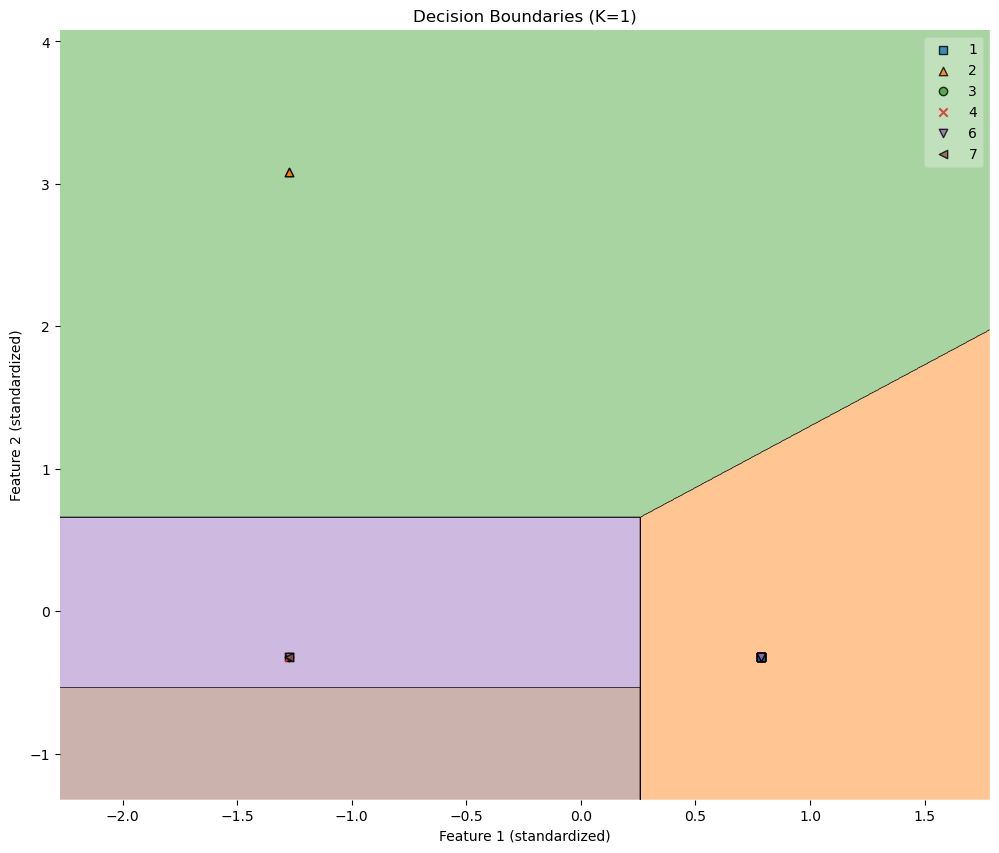

In [43]:
#visualising the decision boundries (using first two columns)
from mlxtend.plotting import plot_decision_regions

x_train_visual=x_train[:, :2]
x_test_visual=x_test[:, :2]
# print(x_train_visual)
# print(x_test_visual)

knn_vis=KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_vis.fit(x_train_visual, y_train)

plt.figure(figsize=(12,10))
plot_decision_regions(x_test_visual,y_test.to_numpy(),clf=knn_vis)#, legends=2)  #clf defines the nsme of classifier which prdicts the label
plt.title(f"Decision Boundaries (K={1})")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.show()

C:\Users\peros\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


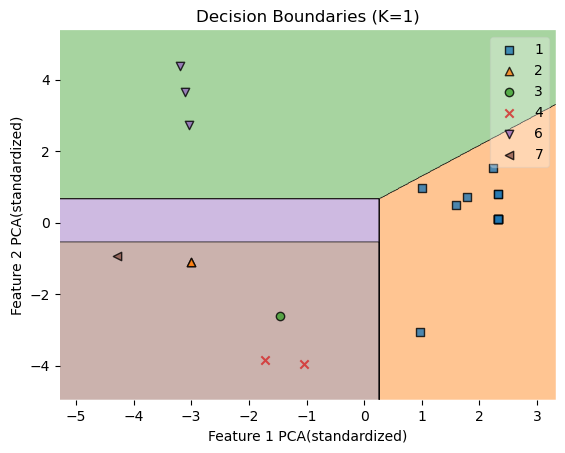

In [44]:
#we will be using PCA to reduce the dimension of the dataset and used all the columns to plot the decision boundries
from sklearn.decomposition import PCA

# reducing the dataset for 2-D visualisation
pca=PCA(n_components=2)
x_train_vis=pca.fit_transform(x_train)
x_test_vis=pca.fit_transform(x_test)

# fitting the model
knn_via=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_vis,y_train)

plot_decision_regions(x_test_vis,y_test.to_numpy(),clf=knn_vis)
plt.title(f"Decision Boundaries (K={1})")
plt.xlabel("Feature 1 PCA(standardized)")
plt.ylabel("Feature 2 PCA(standardized)")
plt.show()

#### Interview Questions:
**A. What are the key hyperparameters in KNN?**

**Answer : Key Hyperparameters in KNN are:**

**1. Number of Neighbors (k)**
* The most important hyperparameter in KNN.
* Determines how many nearest neighbors are considered when classifying a data point.

**2. Distance Metric :** Defines how the distance between two points is calculated.
Common metrics are:
* Euclidean distance (default in most implementations).
* Manhattan distance.
* Minkowski distance.
* Cosine similarity.

**3. Weighting of Neighbors (weights)**
* Determines how the contribution of neighbors is weighted:
* Uniform: All neighbors contribute equally.
* Distance: Closer neighbors have a higher influence than farther ones.

**4. Power Parameter (p)**
* Used with the Minkowski distance metric.
* Controls the type of distance:
  * p=1: Manhattan distance.
  * p=2: Euclidean distance.


**B. What distance metrics can be used in KNN?**

**Answer : Distance Metrics in KNN are:**

**a. Euclidean Distance :** (Default in most implementations) Measures straight-line distance in an n-dimensional space, suitable for continuous variables
   - Formula: d(p,q) = sum(q(i) - p(i))^2

**b. Manhattan Distance :** Measures distance by summing absolute differences between points, works well when the data dimensions are independent
   - Formula:  d(p,q) = sum(abs(q(i) - p(i)))

**c. Minkowski Distance :** Generalization of Euclidean and Manhattan distances:
   - `p=1`: Manhattan distance.  
   - `p=2`: Euclidean distance.

**d. Chebyshev Distance** Considers the largest difference across any single dimension, suitable for grid-based problems.
   - Formula:  d(p,q) = max|q(i) - p(i)|

**e. Cosine Similarity** Measures the cosine of the angle between two vectors, used for text or high-dimensional sparse data.
* Formula: similarit(A,B) = cos(θ) = A.B/|A||B|
* where: A.B - Dot Product and |A||B| - Magnitudes of A and B
